In [2]:
!ls


config.json  Reinforcement-learning-in-portfolio-management-  Untitled.ipynb


In [3]:
cd Reinforcement-learning-in-portfolio-management-/


/home/annguyen/Github/RL-PM/Reinforcement-learning-in-portfolio-management-


In [4]:
ls

 agents/      'Experiments Result'/   main.py     result/       test.py
 config.json   image/                 README.md   result_new/
 data/         LICENSE                report/     summary/


In [4]:
%pycat agents/pg.py

#-*- coding:utf-8 -*-
'''
@Author: Louis Liang
@time:2018/9/15 0:34
'''
import tensorflow as tf
import tflearn
import numpy as np
import os




class PG:
    def __init__(self,M,L,N,name,load_weights,trainable,type,number):
        # Initial buffer
        self.buffer = list()
        self.name = name
        self.learning_rate=10e-3
        self.number=str(number)
        self.type=type
        # Build up models
        self.sesson = tf.Session()

        # Initial input shape
        self.M = M
        self.L = L
        self.N = N
        self.global_step = tf.Variable(0, trainable=False)

        self.state,self.w_previous,self.out=self.build_net()
        self.future_price=tf.placeholder(tf.float32,[None]+[self.M])
        self.pv_vector=tf.reduce_sum(self.out*self.future_price,reduction_indices=[1])*self.pc()
        self.profit=tf.reduce_prod(self.pv_vector)
        self.loss=-tf.reduce_mean(tf.log(self.pv_vector))
        self.optimize=tf.train.AdamOptimizer(self.learning_rate)

In [5]:
#!python main.py
%run main.py --mode="train" --num=3

W1003 00:45:28.571506 140563951167296 deprecation_wrapper.py:119] From /home/annguyen/anaconda3/lib/python3.7/site-packages/tflearn/helpers/summarizer.py:9: The name tf.summary.merge is deprecated. Please use tf.compat.v1.summary.merge instead.

W1003 00:45:28.573553 140563951167296 deprecation_wrapper.py:119] From /home/annguyen/anaconda3/lib/python3.7/site-packages/tflearn/helpers/trainer.py:25: The name tf.summary.FileWriter is deprecated. Please use tf.compat.v1.summary.FileWriter instead.

W1003 00:45:28.587588 140563951167296 deprecation_wrapper.py:119] From /home/annguyen/anaconda3/lib/python3.7/site-packages/tflearn/collections.py:13: The name tf.GraphKeys is deprecated. Please use tf.compat.v1.GraphKeys instead.

W1003 00:45:28.594933 140563951167296 deprecation_wrapper.py:119] From /home/annguyen/anaconda3/lib/python3.7/site-packages/tflearn/config.py:123: The name tf.get_collection is deprecated. Please use tf.compat.v1.get_collection instead.

W1003 00:45:28.602467 14056395

{'mode': 'train', 'num': 3}
*--------------------Training Status-------------------*
Date from 2007-01-01  to  2018-12-30
Features: ['close', 'high']
Agent:Noise( True )---Recoed( True )---Plot( False )
Market Type: China
Predictor: CNN   Framework: PG   Window_length: 10
Epochs: 50
Trainable: True
Reloaded Model: False
Method model_free
Noise_flag True
Record_flag False
Plot_flag False
Create new path at result_new/PG/3/


W1003 00:45:53.734740 140563951167296 deprecation_wrapper.py:119] From /home/annguyen/Github/RL-PM/Reinforcement-learning-in-portfolio-management-/agents/pg.py:23: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W1003 00:45:53.768411 140563951167296 deprecation.py:506] From /home/annguyen/anaconda3/lib/python3.7/site-packages/tflearn/initializations.py:119: calling UniformUnitScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W1003 00:45:53.769413 140563951167296 deprecation.py:323] From /home/annguyen/anaconda3/lib/python3.7/site-packages/tensorflow/python/util/deprecation.py:507: UniformUnitScaling.__init__ (from tensorflow.python.ops.init_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.initializers.variance_scaling instead w

Codes: ['000048', '600962', '000011', '600000', '600698']
Training Time Period: 2007-01-05 00:00:00     2016-09-21 00:00:00
Testing Time Period: 2016-09-22 00:00:00     2018-04-27 00:00:00
finish writing config
*-----------------Loading PG Agent---------------------*


W1003 00:45:54.119880 140563951167296 deprecation.py:323] From /home/annguyen/Github/RL-PM/Reinforcement-learning-in-portfolio-management-/agents/pg.py:94: dense (from tensorflow.python.layers.core) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.dense instead.
W1003 00:45:54.483645 140563951167296 deprecation_wrapper.py:119] From /home/annguyen/Github/RL-PM/Reinforcement-learning-in-portfolio-management-/agents/pg.py:36: The name tf.train.AdamOptimizer is deprecated. Please use tf.compat.v1.train.AdamOptimizer instead.

W1003 00:45:54.840602 140563951167296 deprecation_wrapper.py:119] From /home/annguyen/Github/RL-PM/Reinforcement-learning-in-portfolio-management-/agents/pg.py:39: The name tf.train.Saver is deprecated. Please use tf.compat.v1.train.Saver instead.

W1003 00:45:55.039961 140563951167296 deprecation_wrapper.py:119] From /home/annguyen/Github/RL-PM/Reinforcement-learning-in-portfolio-management-/agents/pg.py:147: The name

Training with 50
Now we are at epoch 0
Reset buffer
*-----Episode: 0, Reward:333.684505%-----*
model write summary
Model save
Create new folder : result_new/PG/3/saved_network/True/
Now we are at epoch 1
Reset buffer
*-----Episode: 1, Reward:334.569169%-----*
model write summary
Model save
Now we are at epoch 2
Reset buffer
*-----Episode: 2, Reward:328.954392%-----*
model write summary
Model save
Now we are at epoch 3
Reset buffer
*-----Episode: 3, Reward:316.007128%-----*
model write summary
Model save
Now we are at epoch 4
Reset buffer
*-----Episode: 4, Reward:326.990533%-----*
model write summary
Model save
Now we are at epoch 5
Reset buffer
*-----Episode: 5, Reward:334.787151%-----*
model write summary
Model save
Now we are at epoch 6
Reset buffer
*-----Episode: 6, Reward:323.824513%-----*
model write summary
Model save
Now we are at epoch 7
Reset buffer
*-----Episode: 7, Reward:377.871185%-----*
model write summary
Model save
Now we are at epoch 8
Reset buffer
*-----Episode: 8, Re

W1003 00:46:27.555481 140563951167296 deprecation.py:323] From /home/annguyen/anaconda3/lib/python3.7/site-packages/tensorflow/python/training/saver.py:960: remove_checkpoint (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to delete files with this prefix.


Reset buffer
*-----Episode: 10, Reward:510.974061%-----*
model write summary
Model save
Now we are at epoch 11
Reset buffer
*-----Episode: 11, Reward:564.172081%-----*
model write summary
Model save
Now we are at epoch 12
Reset buffer
*-----Episode: 12, Reward:674.795325%-----*
model write summary
Model save
Now we are at epoch 13
Reset buffer
*-----Episode: 13, Reward:759.930573%-----*
model write summary
Model save
Now we are at epoch 14
Reset buffer
*-----Episode: 14, Reward:962.805198%-----*
model write summary
Model save
Now we are at epoch 15
Reset buffer
*-----Episode: 15, Reward:1012.960893%-----*
model write summary
Model save
Now we are at epoch 16
Reset buffer
*-----Episode: 16, Reward:993.900129%-----*
model write summary
Model save
Now we are at epoch 17
Reset buffer
*-----Episode: 17, Reward:757.130318%-----*
model write summary
Model save
Now we are at epoch 18
Reset buffer
*-----Episode: 18, Reward:911.805682%-----*
model write summary
Model save
Now we are at epoch 19


Object `agent` not found.


{'mode': 'test', 'num': 3}
*--------------------Training Status-------------------*
Date from 2007-01-01  to  2018-12-30
Features: ['close', 'high']
Agent:Noise( True )---Recoed( True )---Plot( False )
Market Type: China
Predictor: CNN   Framework: PG   Window_length: 10
Epochs: 50
Trainable: True
Reloaded Model: False
Method model_free
Noise_flag True
Record_flag False
Plot_flag False
Loading Model
./saved_network/PG/True/
Successfully loaded: result_new/PG/3/saved_network/True/CNN-PG-10-50
starting to backtest......
saving a file: result_new/PG/3/PG000048-600962-000011-600000-600698-95.55050268178013.csv
finish one agent
saving a file: result_new/PG/3/Winner000048-600962-000011-600000-600698-14.684423957325905.csv
finish one agent
saving a file: result_new/PG/3/UCRP000048-600962-000011-600000-600698-79.96025514896868.csv
finish one agent
saving a file: result_new/PG/3/Losser000048-600962-000011-600000-600698-8.567431092185243.csv
finish one agent
Asset Name     Average daily rate of 

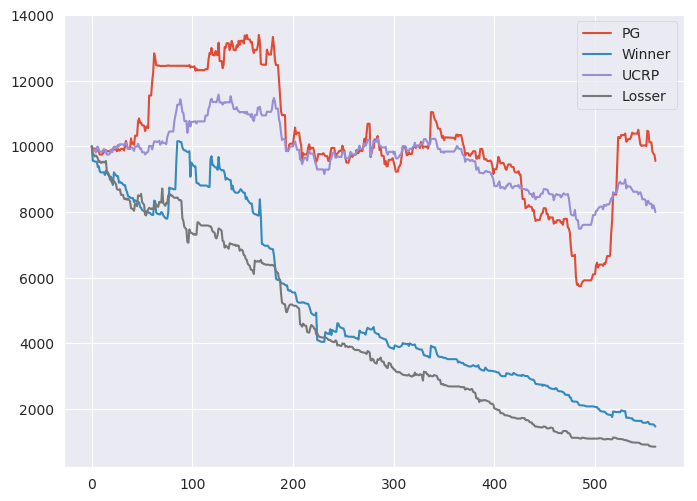

In [7]:
%run main.py --mode="test" --num=3

In [9]:
a = 1
print('sd',a)

sd 1


In [55]:
class car(): 
      
    # init method or constructor 
    def __init__(self, model, color): 
        self.model = model 
        self.color = color 
          
    def show(self): 
        print("Model is", self.model ) 
        print("color is", self.color ) 
          
# both objects have different self which  
# contain their attributes 
audi = car("audi a4", "blue") 
ferrari = car("ferrari 488", "green") 
  
audi.show()     # same output as car.show(audi) 
ferrari.show()  # same output as car.show(ferrari) 
  
# Behind the scene, in every instance method  
# call, python sends the instances also with 
# that method call like car.show(audi) 

Model is audi a4
color is blue
Model is ferrari 488
color is green


In [59]:
class s():
    def show(self):
        a = car("audi a4", "blue")
        a.show()

In [60]:
x = s()

In [61]:
x.show()

Model is audi a4
color is blue


In [44]:
path='result_new/PG/'+'2'+'/'+'saved_network/'+'True'+'/'
if not os.path.exists(path):
    print(os.path.exists(path))
    #os.makedirs(path)
    
    #print(path)
    

In [3]:
c = 0
if not c:
    print(2)

2
